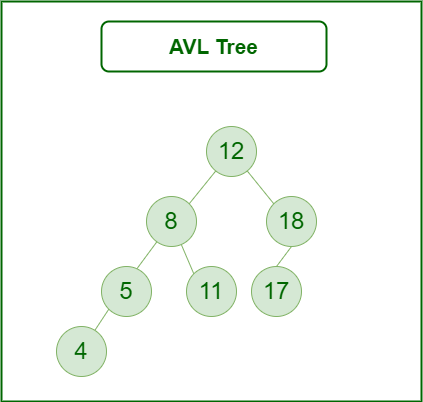

In [ ]:
from IPython.display import Image
Image("https://media.geeksforgeeks.org/wp-content/uploads/20221229121830/avl.png")

# ÁRVORES AVL

As árvores AVL são uma forma de árvores de busca binária auto-balanceadas, nomeadas após seus inventores Adelson-Velskii e Landis. O auto-balanceamento é crucial para manter as operações de busca, inserção e exclusão eficientes, garantindo que a árvore mantenha uma altura logarítmica em relação ao número de nós. Isso é feito assegurando que o fator de balanceamento de cada nó (a diferença de altura entre a subárvore esquerda e a direita) esteja sempre entre -1 e 1.

## Detalhes das Árvores AVL
 - Fator de Balanceamento: É a chave para manter a árvore balanceada. Para qualquer nó na árvore, a diferença de altura entre suas subárvores esquerda e direita deve ser -1, 0, ou 1. Se essa condição for violada após uma operação de inserção ou exclusão, a árvore deve ser reestruturada.

 - Rotações: Para corrigir o balanceamento, as árvores AVL usam rotações simples e duplas: rotação para a direita, rotação para a esquerda, rotação dupla para a direita (rotação para a esquerda seguida de rotação para a direita) e rotação dupla para a esquerda (rotação para a direita seguida de rotação para a esquerda). Essas rotações são usadas para redistribuir os nós da árvore de modo a restabelecer o fator de balanceamento permitido.


## Rotação a Esquerda:

  Quando um nó é adicionado à subárvore direita da subárvore direita, se a árvore ficar desbalanceada, é realizada uma única rotação para a esquerda.

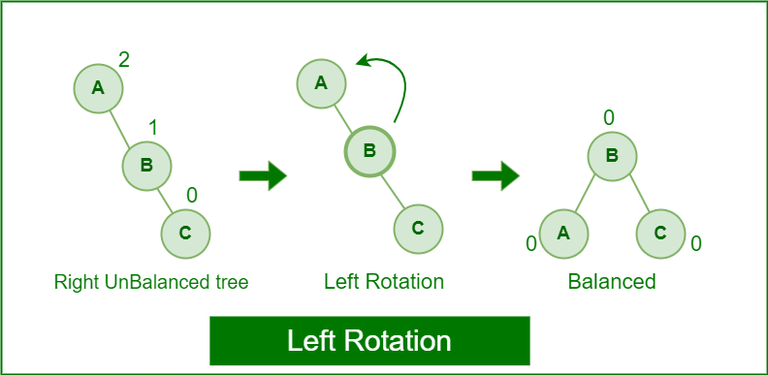

In [ ]:
from IPython.display import Image
Image("https://media.geeksforgeeks.org/wp-content/uploads/20221229131815/avl11-(1)-768.png")

## Rotação direita :

Se um nó for adicionado à subárvore esquerda da subárvore esquerda, a árvore AVL pode ficar desequilibrada, fazemos uma única rotação para a direita.

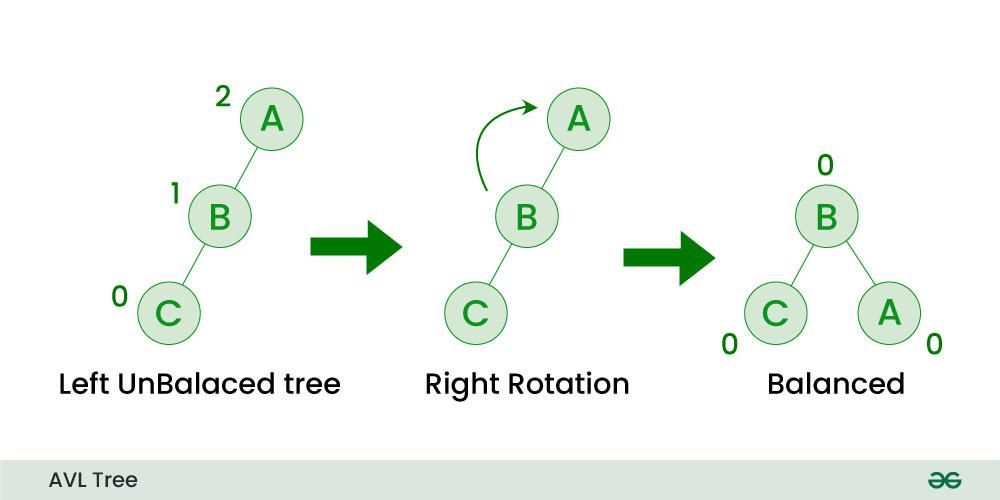

In [ ]:
from IPython.display import Image
Image("https://media.geeksforgeeks.org/wp-content/uploads/20231102165654/avl-tree.jpg")

## Rotação esquerda-direita :

Uma rotação esquerda-direita é uma combinação na qual a primeira rotação para a esquerda ocorre após a execução da rotação para a direita.

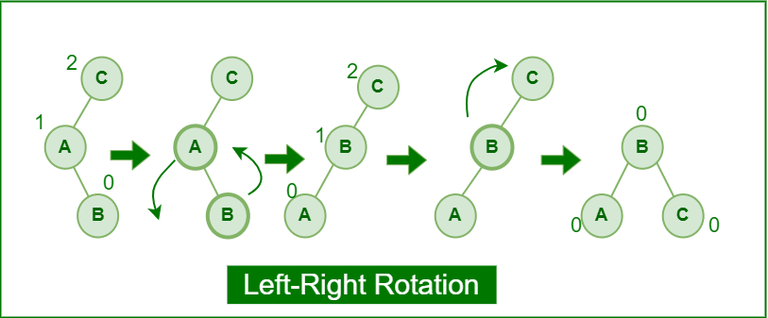

In [ ]:
from IPython.display import Image
Image("https://media.geeksforgeeks.org/wp-content/uploads/20221229131629/avl33-(1)-768.png")

## Rotação direita-esquerda :

Uma rotação direita-esquerda é uma combinação na qual a primeira rotação para a direita ocorre após a execução da rotação para a esquerda.

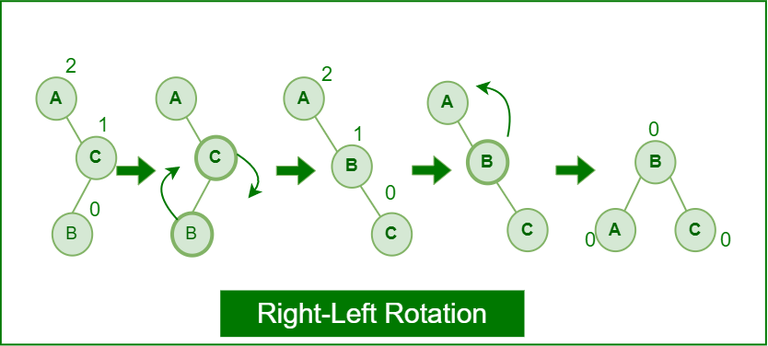

In [ ]:
from IPython.display import Image
Image("https://media.geeksforgeeks.org/wp-content/uploads/20221229131517/avl44-(1)-768.png")


## Exemplos de Aplicação Prática

1. Sistemas de Bancos de Dados: Árvores AVL podem ser utilizadas em sistemas de gerenciamento de bancos de dados para indexação rápida, onde a eficiência das operações de busca, inserção e exclusão é crítica para o desempenho geral do sistema.

2. Sistemas de Arquivos: Elas podem ser aplicadas na organização de sistemas de arquivos para garantir acesso rápido e eficiente aos dados, especialmente em sistemas onde as operações de leitura e escrita são frequentes e a eficiência é uma preocupação.

3. Autocompletar: Em interfaces de usuário onde o autocompletar é uma funcionalidade oferecida, as árvores AVL podem ser utilizadas para armazenar os possíveis completamentos e oferecê-los rapidamente ao usuário à medida que ele digita.

4. Redes de Computadores: Em tabelas de roteamento onde o equilíbrio entre eficiência de inserção e busca é necessário, as árvores AVL podem ser utilizadas para manter as rotas organizadas de maneira eficiente.

5. Jogos: Em jogos, especialmente aqueles que requerem uma busca rápida e eficiente de dados ou entidades, as árvores AVL podem ser usadas para gerenciar entidades em um espaço de jogo, permitindo atualizações e consultas rápidas sobre o estado do jogo.

Essas aplicações destacam a importância das árvores AVL em vários domínios onde a eficiência na manipulação de dados é crucial. A habilidade das árvores AVL de manter-se balanceadas com operações de inserção e exclusão frequentes as torna uma estrutura de dados valiosa para garantir desempenho eficiente em tempo de execução.

In [1]:
%matplotlib inline
from PIL import Image # carregar a imagem das árvores

import random # gerar valores aleatórios
from collections import deque #

from graphviz import Digraph # biblioteca para desenhar árvores

import matplotlib.pyplot as plt # plot gráficos
import numpy as np # biblioteca numerica python
import queue # Estruturas de dados de filas

In [6]:
# Cria a classe nó para
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
        self.height = 1  # altura do nó na árvore

class AVLTree:
    # pegar a altura da árvore
    def getHeight(self, root):
        if not root:
            return 0
        return root.height

    # pegar o balanceamento das subarvores direita e esquerda
    # O resultado deve estar entre -1 e 1
    def getBalance(self, root):
        if not root:
            return 0
        return self.getHeight(root.left) - self.getHeight(root.right)

    # realizar a rotação para a direita
    def rightRotate(self, y):
        x = y.left
        T2 = x.right

        #realiza a rotação
        x.right = y
        y.left = T2

        # Atualiza alturas
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))
        x.height = 1 + max(self.getHeight(x.left), self.getHeight(x.right))
        return x # retorna a nova raiz

    # realizar a rotação para a esquerda
    def leftRotate(self, x):
        y = x.right
        T2 = y.left

        #realiza a rotação
        y.left = x
        x.right = T2

        # Atualiza alturas
        x.height = 1 + max(self.getHeight(x.left), self.getHeight(x.right))
        y.height = 1 + max(self.getHeight(y.left), self.getHeight(y.right))
        return y

    # ================== metodo inserir =======================================
    def insert(self, root, key):
        if not root:
            return Node(key)
        elif key < root.key:
            root.left = self.insert(root.left, key)
        else:
            root.right = self.insert(root.right, key)

        # incrementa + 1 na altura da maior subarvore
        root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right))

        # calcula o balanceamento da árvore
        balance = self.getBalance(root)

        # Caso Esquerda-Esquerda
        if balance > 1 and key < root.left.key:
            return self.rightRotate(root)

        # Caso Direita-Direita
        if balance < -1 and key > root.right.key:
            return self.leftRotate(root)

        # Caso Esquerda-Direita
        if balance > 1 and key > root.left.key:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)

        # Caso Direita-Esquerda
        if balance < -1 and key < root.right.key:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)

        return root

    def delete(self, root, key):
        if not root:
            return root

        # Primeiro, encontre o nó a ser deletado.
        if key < root.key:
            root.left = self.delete(root.left, key)
        elif key > root.key:
            root.right = self.delete(root.right, key)
        else:
            # Nó com apenas um filho ou sem filho
            if root.left is None:
                temp = root.right
                root = None
                return temp
            elif root.right is None:
                temp = root.left
                root = None
                return temp

            # Nó com dois filhos: obtenha o sucessor (menor na subárvore direita)
            temp = self.minValueNode(root.right)

            # Copie o conteúdo do sucessor para este nó
            root.key = temp.key

            # Delete o sucessor
            root.right = self.delete(root.right, temp.key)

        # Se a árvore tinha apenas um nó, então retorne
        if root is None:
            return root

        # Atualize a altura do nó atual
        root.height = 1 + max(self.getHeight(root.left), self.getHeight(root.right))

        # Verifique o balanceamento e aplique rotações se necessário
        balance = self.getBalance(root)

        # Rotações
        # rotação para a direita
        if balance > 1 and self.getBalance(root.left) >= 0:
            return self.rightRotate(root)
        # rotação para a esquerda
        if balance < -1 and self.getBalance(root.right) <= 0:
            return self.leftRotate(root)

        # rotação para a esquerda e direita
        if balance > 1 and self.getBalance(root.left) < 0:
            root.left = self.leftRotate(root.left)
            return self.rightRotate(root)
        # rotação para a direita e esquerda
        if balance < -1 and self.getBalance(root.right) > 0:
            root.right = self.rightRotate(root.right)
            return self.leftRotate(root)

        return root

    #encontra o menor nó da subarvore da direita (remoção com 2 filhos)
    def minValueNode(self, node):
        current = node
        while current.left is not None:
            current = current.left
        return current


    def search(self, root, key):
        # Caso base: raiz é nula ou a chave na raiz é igual à chave procurada
        if root is None or root.key == key:
            return root

        # Se a chave procurada é menor que a chave da raiz, então ela deve estar na subárvore esquerda
        if key < root.key:
            return self.search(root.left, key)

        # Se a chave procurada é maior que a chave da raiz, então ela deve estar na subárvore direita
        return self.search(root.right, key)

    # pesquisar a profundidade de um nó da árvore
    def getNodeDepth(self, root, key, current_depth=0):
        if not root:
            return -1  # Indica que o nó não foi encontrado
        if root.key == key:
            return current_depth

        # Se a chave procurada é menor que a chave da raiz, vá para a subárvore esquerda
        if key < root.key:
            return self.getNodeDepth(root.left, key, current_depth + 1)
        # Se a chave procurada é maior que a chave da raiz, vá para a subárvore direita
        else:
            return self.getNodeDepth(root.right, key, current_depth + 1)

    # pegar os valores em cada nivel da arvoré
    def levelOrderLists(self, root):
        levels = [] # nivel vázio
        if not root:
            return levels

        queue = [root]
        while queue:
            level_length = len(queue)
            current_level = []
            # _ uso de variável descartável.
            for _ in range(level_length): # adiciona os elementos de cada nível da arvore em uma lista
                node = queue.pop(0)
                current_level.append(node.key)
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
            levels.append(current_level)

        return levels

    #################### Funções para percorrear a árvore ###################
    # --------- Função para realizar a travessia em ordem -------------------
    def in_order_traversal(self, root): # carrega a árvore
        if root: # se o nó for diferente de None
            self.in_order_traversal(root.left)  # Visita o filho à esquerda
            print(root.key, end=' ')  # Mostra o valor do nó
            self.in_order_traversal(root.right)  # Visita o filho à direita

    # -------- Função de travessia em pré-ordem -----------------------------
    def pre_order_traversal(self, root):
        if root:
            print(root.key, end=' ')  # Mostra o valor do nó
            self.pre_order_traversal(root.left)  # Visita o filho à esquerda
            self.pre_order_traversal(root.right)  # Visita o filho à direita

    # ------- Função de travessia em pós-ordem ------------------------------
    def post_order_traversal(self, root):
        if root:
            self.post_order_traversal(root.left)  # Visita o filho à esquerda
            self.post_order_traversal(root.right)  # Visita o filho à direita
            print(root.key, end=' ')  # Mostra o valor do nó
    # ---------  Level-Order Travessia (ou Breadth-First Search) ------------


    ################ Funções para gerar a visualização da árvore ###############
    # Gerar visualuzação
    def visualize(self, root):
        def add_nodes_edges(root, graph):
            if root:
                graph.node(str(root.key), str(root.key))
                if root.left:
                    graph.edge(str(root.key), str(root.left.key))
                    add_nodes_edges(root.left, graph)
                if root.right:
                    graph.edge(str(root.key), str(root.right.key))
                    add_nodes_edges(root.right, graph)

        graph = Digraph()
        graph.format = 'png'
        add_nodes_edges(root, graph)
        graph.render('tree_alv', view=True,)
        return graph


Travessia em ordem da árvore binária:
10 20 25 30 40 

Travessia em pós-ordem da árvore binária:
10 25 20 40 30 

Travessia em pré-ordem da árvore binária:
30 20 10 25 40 

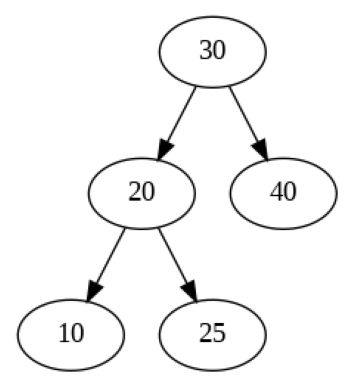

In [7]:
# Criação da árvore e inserção de elementos
avl = AVLTree()
root = None
nos = [30,40,20,25,10]
#nos = [10, 20, 30, 40, 50, 25, 22, 29, 15]
#nos = [10, 20, 30, 40, 50, 25, 22, 29, 15,21]

for no in nos:
    root = avl.insert(root, no)


# Travessia da árvore em ordem
print("Travessia em ordem da árvore binária:")
avl.in_order_traversal(root)
print("\n")

# Travessia da árvore em pré-ordem
print("Travessia em pós-ordem da árvore binária:")
avl.post_order_traversal(root)
print("\n")

# Travessia da árvore em pré-ordem
print("Travessia em pré-ordem da árvore binária:")
avl.pre_order_traversal(root)

# Visualizar a árvore AVL
avl.visualize(root)
img = np.asarray(Image.open('/content/tree_alv.png'))
plt.axis('off')
imgplot = plt.imshow(img)



## Pesquisar
A busca de um elemento na árvore AVL,  passamos a raiz e o valor a ser buscado. O método retorna o nó que contém o valor, se encontrado, ou None caso contrário.

In [ ]:
result = avl.search(root, 100)

if result:
    print("Valor encontrado:", result.key)
else:
    print("Valor não encontrado")

Valor não encontrado


# Deletar um nó da Árvore AVL

Para deletar um elemento de uma árvore AVL e manter o balanceamento da árvore, precisamos seguir alguns passos. A exclusão de um nó pode ser mais complexa do que a inserção porque, após remover um nó, a árvore pode ficar desbalanceada, exigindo potencialmente várias rotações para restaurar o balanceamento. Vamos implementar um método delete na nossa classe AVLTree que lida com essas questões.

1. Nó folha ou nó com um único filho: Remove o nó e substitui-o pelo seu filho, se houver.

2. Nó com dois filhos: Encontra o sucessor in-order (o menor nó na subárvore direita), copia o valor do sucessor para o nó a ser deletado e, em seguida, deleta o sucessor.
Após a remoção, o método verifica e restaura o balanceamento da árvore, se necessário, usando rotações.

O método minValueNode é uma função auxiliar usada para encontrar o nó com o valor mínimo em uma árvore, começando de um nó dado. É útil para encontrar o sucessor in-order durante a exclusão de um nó com dois filhos.

Travessia em pré-ordem da árvore binária:
29 22 15 40 30 50 

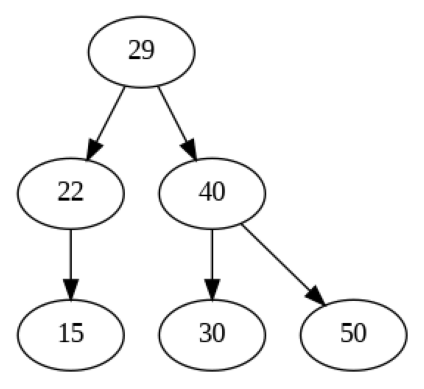

In [ ]:
root = avl.delete(root, 20)
# Travessia da árvore em pré-ordem
print("Travessia em pré-ordem da árvore binária:")
avl.pre_order_traversal(root)
# Visualizar a árvore AVL
avl.visualize(root)
img = np.asarray(Image.open('/content/tree_alv.png'))
plt.axis('off')
imgplot = plt.imshow(img)

## Travessias em Arvore AVL

1. In-Order Travessia :
Na travessia in-order (em ordem), primeiro visitamos recursivamente o filho esquerdo do nó, depois o próprio nó, e finalmente o filho direito. Esta travessia produz os elementos da árvore em ordem crescente.

2. Pre-Order Travessia:
Na travessia pre-order (pré-ordem), visitamos o nó antes de seus filhos. Primeiro visitamos o nó atual, depois recursivamente o filho esquerdo e, finalmente, o filho direito. Esta travessia é útil para copiar a árvore.

3. Post-Order Travessia:
Na travessia post-order (pós-ordem), visitamos o nó após seus filhos. Primeiro visitamos recursivamente o filho esquerdo, depois o filho direito, e finalmente o nó atual. Esta travessia é frequentemente usada para deletar ou liberar nós e seus recursos da memória de forma segura.


In [ ]:
# Travessia da árvore em ordem
print("Travessia em ordem da árvore binária:")
avl.in_order_traversal(root)
print("\n")


Travessia em ordem da árvore binária:
15 22 29 30 40 50 



In [ ]:
# Travessia da árvore em pós-ordem
print("Travessia em pós-ordem da árvore binária:")
avl.post_order_traversal(root)
print("\n")


Travessia em pós-ordem da árvore binária:
15 22 30 50 40 29 



In [ ]:
# Travessia da árvore em pré-ordem
print("Travessia em pré-ordem da árvore binária:")
avl.pre_order_traversal(root)

Travessia em pré-ordem da árvore binária:
29 22 15 40 30 50 

# Pesquisar a "Altura ou Profundidade" de uma árvore AVL

A altura de uma árvore AVL pode ser calculada percorrendo a árvore. No entanto, uma das vantagens das árvores AVL é que elas mantêm a altura balanceada através de rotações durante as operações de inserção e exclusão, e cada nó na árvore AVL já armazena sua altura. Isso significa que podemos obter a altura da árvore AVL simplesmente olhando a altura armazenada em sua raiz.

In [ ]:
print("Profundidade da árvore:", avl.getHeight(root))

Profundidade da árvore: 4


## Calcular a profundidade de um nó da uma Árvore AVL


Para calcular a profundidade de um nó específico em relação à raiz, você precisaria percorrer a árvore da raiz até o nó, incrementando um contador a cada nível que você desce. Isso não é algo que é geralmente armazenado em cada nó em uma árvore AVL, pois a profundidade de um nó pode mudar se a árvore for reestruturada.

In [ ]:
# Supondo que você já tenha inserido alguns nós na árvore AVL...
key = 50  # A chave do nó cuja profundidade você quer encontrar
depth = avl.getNodeDepth(root, key)

if depth >= 0:
    print(f"A profundidade do nó com a chave {key} é {depth}.")
else:
    print(f"O nó com a chave {key} não foi encontrado na árvore.")

A profundidade do nó com a chave 50 é 2.


# Quantidade de Níveis em uma Arvore Binária de Busca

Para pesquisar os níveis de uma árvore AVL, podemos realizar uma travessia level-order (em níveis). Essa travessia, também conhecida como busca em largura (BFS - Breadth-First Search), visita todos os nós de cada nível da árvore, da esquerda para a direita, antes de prosseguir para o nível seguinte. Essa abordagem é eficaz para identificar os níveis da árvore e pode ser implementada usando uma fila para rastrear os nós a serem visitados.

In [ ]:
level = avl.levelOrderLists(root)
print(level)

for i in range(len(level)):
  print("Nível {}: {}".format(i, level[i]))

[[29], [22, 40], [15, 30, 50]]
Nível 0: [29]
Nível 1: [22, 40]
Nível 2: [15, 30, 50]


# Criando Exemplos de Árvores AVL com valores Aleatórios

{9, 10, 12, 13, 17, 19, 21, 23, 26, 31, 34, 37, 41, 42, 51, 54, 56, 59, 62, 63, 66, 67, 70, 72, 76, 77, 78, 79, 82, 90, 91, 93, 96, 97, 100}
Travessia em ordem da árvore binária:
9 10 12 13 17 19 21 23 26 31 34 37 41 42 51 54 56 59 62 63 66 67 70 72 76 77 78 79 82 90 91 93 96 97 100 

Travessia em pós-ordem da árvore binária:
9 12 10 17 21 19 13 26 34 31 41 51 42 37 23 56 62 59 66 70 67 63 76 78 77 82 91 90 96 100 97 93 79 72 54 

Travessia em pré-ordem da árvore binária:
54 23 13 10 9 12 19 17 21 37 31 26 34 42 41 51 72 63 59 56 62 67 66 70 79 77 76 78 93 90 82 91 97 96 100 

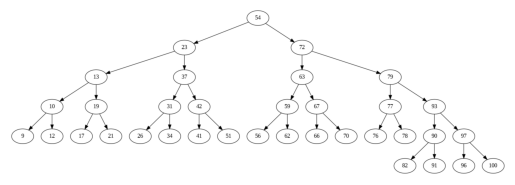

In [ ]:
# Criação da árvore e inserção de elementos



# Criação da árvore e inserção de elementos
tree = AVLTree()
root = None

# criando os nos
nos = set([random.randint(1,100) for i in range(40)])
print(nos)

for no in nos:
    root = tree.insert(root, no)



# Travessia da árvore em ordem
print("Travessia em ordem da árvore binária:")
avl.in_order_traversal(root)
print("\n")

# Travessia da árvore em pré-ordem
print("Travessia em pós-ordem da árvore binária:")
avl.post_order_traversal(root)
print("\n")

# Travessia da árvore em pré-ordem
print("Travessia em pré-ordem da árvore binária:")
avl.pre_order_traversal(root)

# Visualizar a árvore AVL
avl.visualize(root)
img = np.asarray(Image.open('/content/tree_alv.png'))
plt.axis('off')
imgplot = plt.imshow(img)

# Estudos Complementares

## DEQUE

Deque (Doubly Ended Queue) em Python é implementado usando o módulo “colections”. Deque é preferível a uma lista nos casos em que precisamos de operações de "append" e "pop" mais rápidas de ambas as extremidades do da estrutura de dados, pois deque fornece uma complexidade de tempo O(1) para operações de append e pop em comparação com uma lista que fornece O(n) complexidade de tempo.

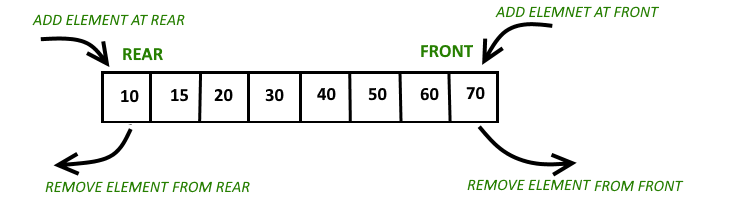

In [ ]:
from IPython.display import Image
Image("https://media.geeksforgeeks.org/wp-content/uploads/anod.png")


In [ ]:
from collections import deque

# Criar um deque vazio
d = deque()

# Adicionar elementos ao final do deque
for i in range(10):
  d.append(i)

print(d)

# Adicionar elementos ao começo do deque
d.appendleft(0)
print(d)

# Remover e retornar um elemento do final
print(d.pop()) # 2
print(d)

# Remover e retornar um elemento do começo
print(d.popleft()) # 0
print(d)



deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
deque([0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
9
deque([0, 0, 1, 2, 3, 4, 5, 6, 7, 8])
0
deque([0, 1, 2, 3, 4, 5, 6, 7, 8])


## Variável de descarte _

O uso do _ como variável de descarte é uma convenção amplamente adotada porque ajuda a tornar o código mais legível, indicando claramente ao leitor que determinados valores não são importantes para a execução do código.

In [ ]:
# exemplo de variável de descarte
t = [0,1,2,3,4,5,6]
for _ in range(len(t)):
  t.pop()
  print(t)

[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 2]
[0, 1]
[0]
[]
